# Iris
In this notebook we will use Knn to predict flower type using sklearn's iris data.

In [72]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import numpy as np
import sklearn.neighbors as nn

In [17]:
iris = datasets.load_iris()

## EDA
Here we will look at what features we have and choose 2 dims.

In [48]:
print(iris.feature_names,
iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


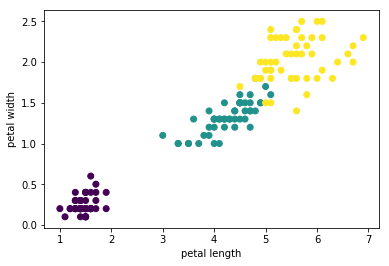

In [36]:
X = iris.data[:,2:]
plt.scatter(X[:,0], X[:,1], c=iris.target)
plt.ylabel('petal width')
plt.xlabel('petal length')
plt.show()

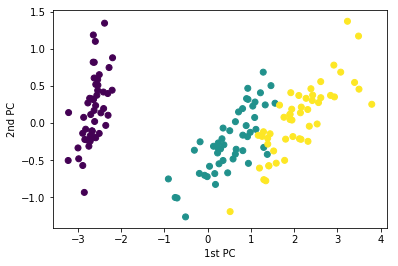

In [46]:
# look at the 1st 2 PCs using SVD
XPC = PCA(n_components=2).fit_transform(iris.data)
plt.scatter(XPC[:,0],XPC[:,1], c=iris.target)
plt.ylabel('2nd PC')
plt.xlabel('1st PC')
plt.show()

## Model
Let's use Knn to try to predict the type of some of these flowers.

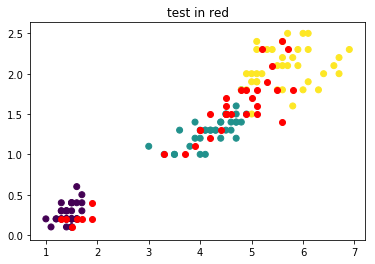

In [71]:
# split up training and test
frac = 0.8
msc=np.random.rand(len(iris.data)) < frac

train = iris.data[msc]
trainTarg = iris.target[msc]

test = iris.data[~msc]
testTarg = iris.target[~msc]

# plot train and test together
plt.scatter(train[:,2],train[:,3],c=trainTarg)
plt.scatter(test[:,2],test[:,3],c='r')
plt.title('test in red')
plt.show()

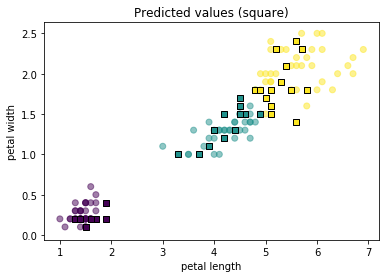

Mean accuracy on given test data : 0.916666666667


In [111]:
# train
knn = nn.classification.KNeighborsClassifier(n_neighbors=5, algorithm='brute')
knn.fit(train[:,2:],trainTarg)

# predict
pred = knn.predict(test[:,2:])

# plot train and test together
plt.scatter(train[:,2],train[:,3],c=trainTarg, alpha=0.5)
plt.scatter(test[:,2],test[:,3],c=pred,edgecolors='black',marker='s')
plt.title('Predicted values (square)')
plt.ylabel('petal width')
plt.xlabel('petal length')
plt.show()

# let's see how well we did
print("Mean accuracy on given test data :", knn.score(test[:,2:],testTarg))

Our accuracy is pretty good with nn=5. Let's play with the number of neighbors.

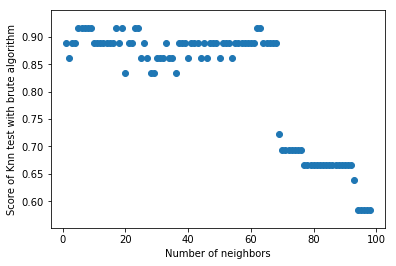

In [122]:
def GetKnnScore(train, trainTarg, num):
    # train
    knn = nn.classification.KNeighborsClassifier(n_neighbors=num, algorithm='brute')
    knn.fit(train[:,2:],trainTarg)

    # predict
    pred = knn.predict(test[:,2:])

    return knn.score(test[:,2:],testTarg)

nnScore = np.asarray([[i, GetKnnScore(train,trainTarg,i)] for i in range(1,99)])
plt.scatter(nnScore[:,0],nnScore[:,1])
plt.ylabel('Score of Knn test with brute algorithm')
plt.xlabel('Number of neighbors')
plt.show()